In [1]:
from datetime import timedelta
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from lib import y_smooth, go_chart, distribution, chart_distribution

import colorlover as cl
from IPython.display import HTML
colors = cl.scales['11']['div']['RdYlBu']
colors = colors[:5] + ['rgb(183,188,143)','rgb(143,188,143)'] + colors[8:]
HTML(cl.to_html(colors))

In [2]:
xls = pd.ExcelFile("coronav_20200326.xls")
cases = xls.parse('cases')
deaths = xls.parse('deaths')
recovery = xls.parse('recovery')

cases['date'] = pd.to_datetime(cases['date'])
deaths['date'] = pd.to_datetime(cases['date'])
recovery['date'] = pd.to_datetime(recovery['date'])

cases = cases.set_index('date')
deaths = deaths.set_index('date')
recovery = recovery.set_index('date')

# daily by country

$ A = 979.550\  \mu = 32.786\  \sigma = 8.645\ k = -1.566 $


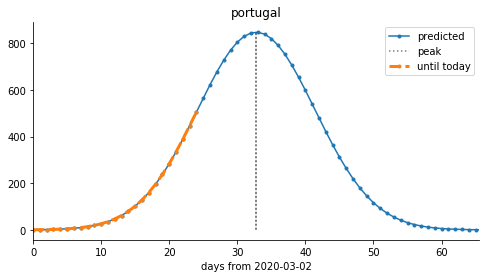

$ A = 5603.227\  \mu = 31.985\  \sigma = 9.010\ k = 96.614 $


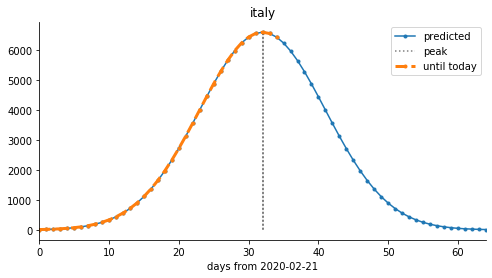

$ A = 18957.959\  \mu = 51.050\  \sigma = 16.330\ k = -259.207 $


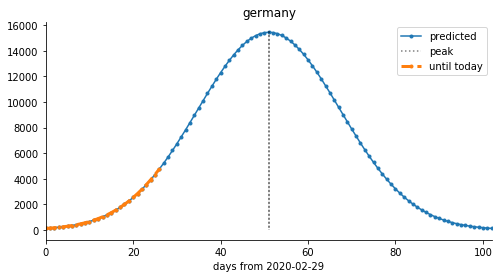

$ A = 15782704.563\  \mu = 136.505\  \sigma = 28.796\ k = -273.180 $


/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



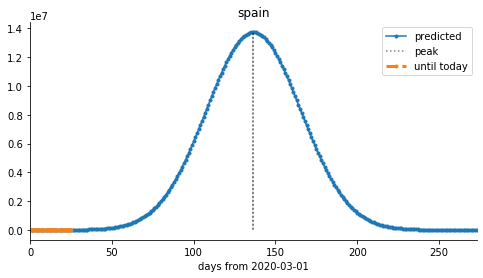

/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



$ A = 2440516.533\  \mu = 144.243\  \sigma = 32.056\ k = -132.654 $


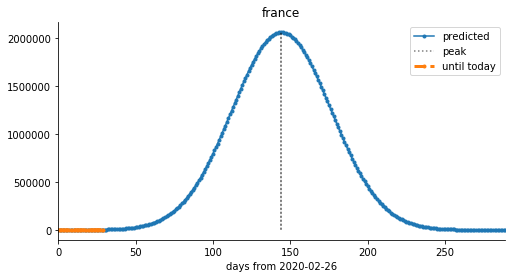

$ A = 84931558.420\  \mu = 150.674\  \sigma = 26.968\ k = -6.192 $


/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



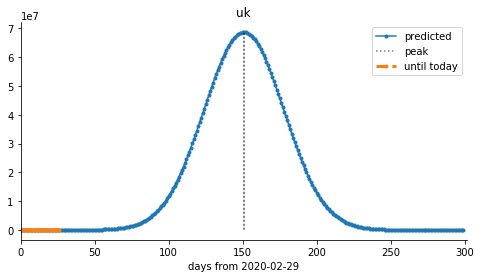

$ A = 33725.374\  \mu = 27.341\  \sigma = 7.879\ k = -108.793 $


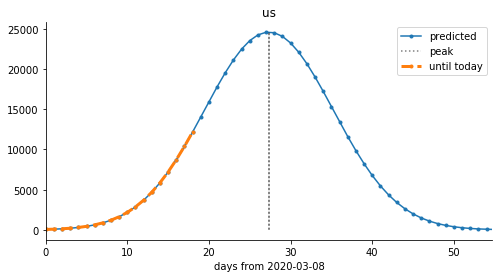

$ A = 4327.614\  \mu = 17.998\  \sigma = 7.164\ k = 42.323 $


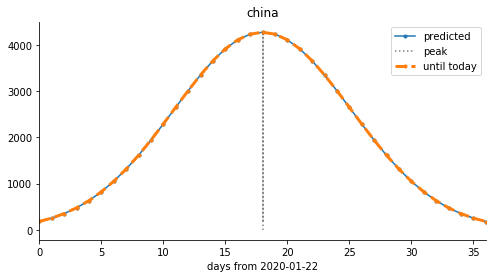

$ A = 623.046\  \mu = 12.877\  \sigma = 3.737\ k = 88.809 $


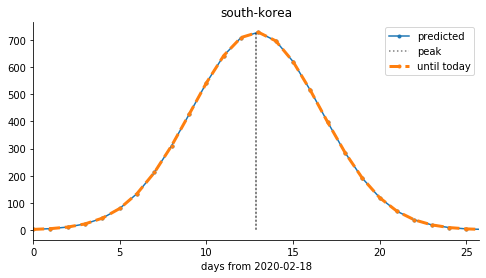

$ A = 265529.239\  \mu = 417.899\  \sigma = 1360.058\ k = -253235.545 $


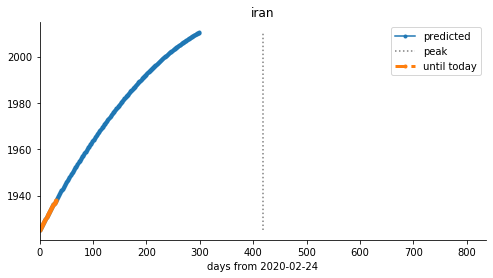

In [3]:
for col in cases.columns:
        
    mindate = min(cases.loc[cases[col].notnull()].index)-timedelta(days=1)
    y = cases.loc[cases[col].index>=mindate,col].fillna(0)
    x = np.arange(len(y))
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y,res_print=True)
    chart_distribution(y,ydata,col,ylabel='daily cases',prediction=True)
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y)
    y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])

    plt.figure(figsize=(8,4))
    plt.title(col)
    plt.plot(x_axis, y_div, '.-',label='predicted')
    plt.plot(c[1]*np.ones(len(y_div)), y_div, ':k',alpha=.5,label='peak')
    plt.plot(x_axis[:len(y)], y_div[:len(y)], '.--',lw=3,color='C1',label='until today')
    plt.xlim([0,c[1]*2])
    plt.xlabel('days from %s'%str(y.index[0])[:10])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    plt.show()

/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



$ A = 116439.758\  \mu = 79.642\  \sigma = 15.839\ k = -0.530 $


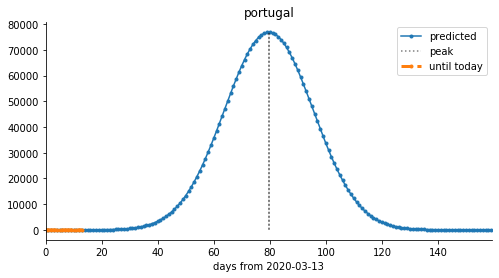

$ A = 897.313\  \mu = 33.069\  \sigma = 10.545\ k = -9.914 $


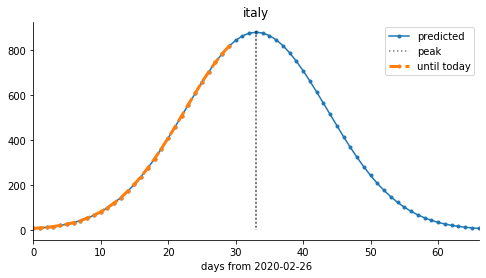

$ A = 1869639.233\  \mu = 106.364\  \sigma = 18.984\ k = 0.099 $


/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



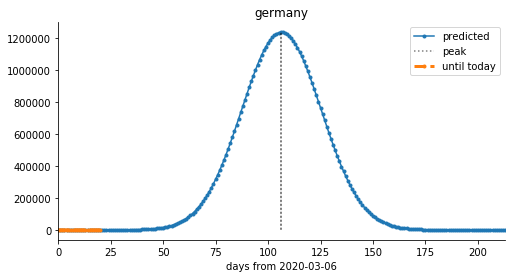

$ A = 793.308\  \mu = 25.262\  \sigma = 5.439\ k = 12.977 $


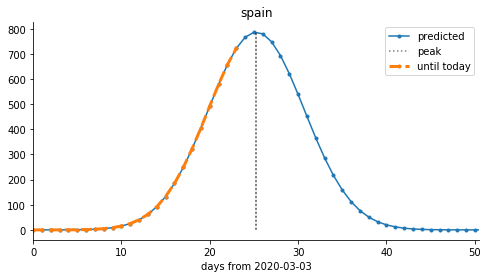

/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



$ A = 6576842.826\  \mu = 123.377\  \sigma = 20.568\ k = 0.328 $


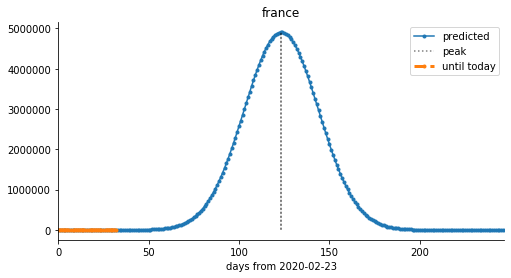

$ A = 592.491\  \mu = 51.249\  \sigma = 14.321\ k = -2.937 $


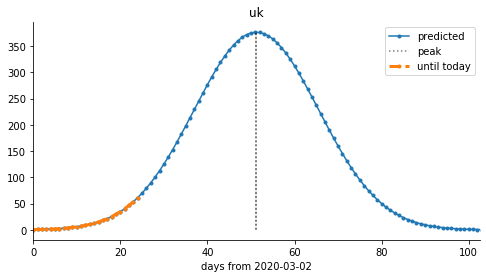

$ A = 290.894\  \mu = 28.473\  \sigma = 3.872\ k = 5.827 $


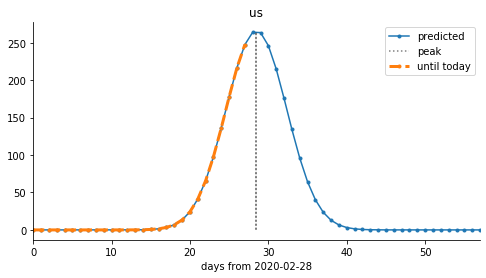

$ A = 118.497\  \mu = 23.018\  \sigma = 8.960\ k = 9.126 $


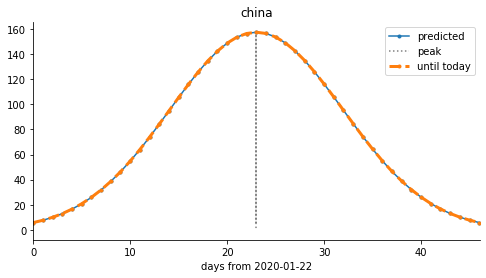

$ A = 7362.044\  \mu = 84.185\  \sigma = 1922.515\ k = -7354.181 $


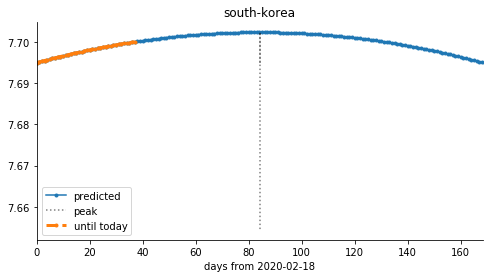

$ A = -175.378\  \mu = 7.005\  \sigma = 13.856\ k = 169.685 $


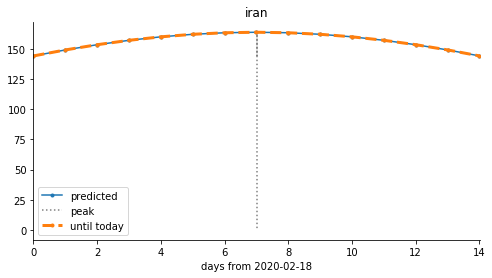

In [4]:
for col in deaths.columns:
        
    mindate = min(deaths.loc[deaths[col].notnull()].index)-timedelta(days=3)
    y = deaths.loc[deaths[col].index>=mindate,col].fillna(0)
    x = np.arange(len(y))
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y,res_print=True)
    chart_distribution(y,ydata,col,ylabel='daily deaths',prediction=True)
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y)
    y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])

    plt.figure(figsize=(8,4))
    plt.title(col)
    plt.plot(x_axis, y_div, '.-',label='predicted')
    plt.plot(c[1]*np.ones(len(y_div)), y_div, ':k',alpha=.5,label='peak')
    plt.plot(x_axis[:len(y)], y_div[:len(y)], '.--',lw=3,color='C1',label='until today')
    plt.xlim([0,c[1]*2])
    plt.xlabel('days from %s'%str(y.index[0])[:10])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    plt.show()

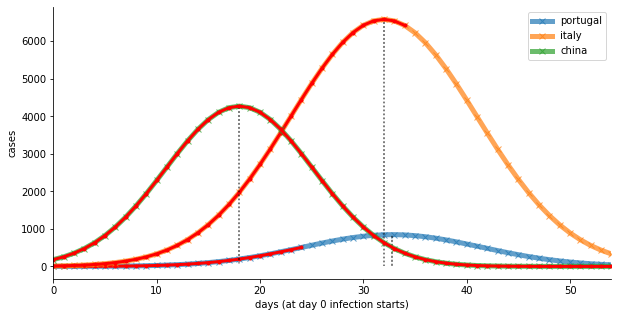

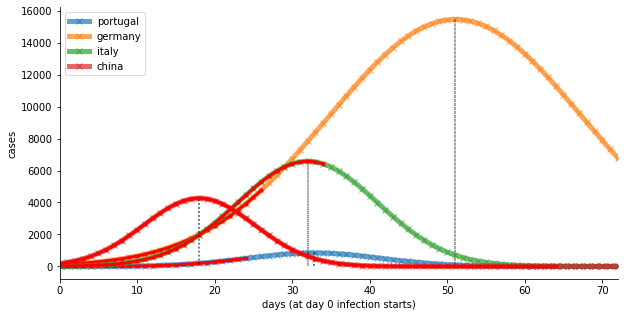

In [5]:
import matplotlib.dates as mdates

cols = ['C0','C1','C2','C3']

plt.figure(figsize=(10,5))

for i,col in enumerate(['portugal','italy','china']):
        
    mindate = min(cases.loc[cases[col].notnull()].index)-timedelta(days=1)
    y = cases.loc[cases.index>=mindate,col].fillna(0)
    x = np.arange(len(y))
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y)

    y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])
    
    plt.plot(x_axis, y_div, 'x-',lw=5, color=cols[i], alpha=.7,label=col)
    plt.plot(c[1]*np.ones(len(y_div)), y_div, ':k', alpha=.5)
    plt.plot(x_axis[:len(y)], y_div[:len(y)], '.-r',lw=3)
    plt.xlim([0,c[1]*3])
    plt.ylabel('cases')
    plt.xlabel('days (at day 0 infection starts)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    
plt.show()

import matplotlib.dates as mdates

cols = ['C0','C1','C2','C3']

plt.figure(figsize=(10,5))

for i,col in enumerate(['portugal','germany','italy','china']):
        
    mindate = min(cases.loc[cases[col].notnull()].index)-timedelta(days=1)
    y = cases.loc[cases.index>=mindate,col].fillna(0)
    x = np.arange(len(y))
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y)

    y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])
    
    plt.plot(x_axis, y_div, 'x-',lw=5, color=cols[i], alpha=.7,label=col)
    plt.plot(c[1]*np.ones(len(y_div)), y_div, ':k', alpha=.5)
    plt.plot(x_axis[:len(y)], y_div[:len(y)], '.-r',lw=3)
    plt.xlim([0,c[1]*4])
    plt.ylabel('cases')
    plt.xlabel('days (at day 0 infection starts)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    
plt.show()

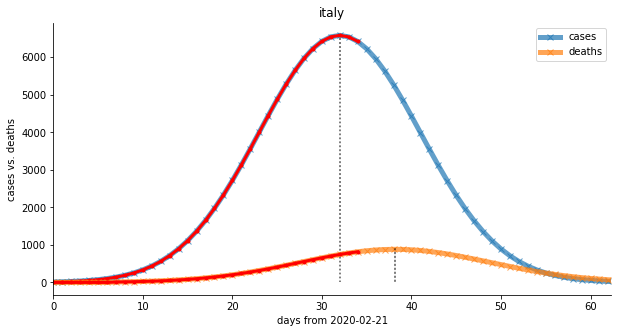

In [6]:
plt.figure(figsize=(10,5))

for col in ['italy',]:
    
    for tmp,lab in zip([cases,deaths],['cases','deaths']):
        
        mindate = min(tmp.loc[tmp[col].notnull()].index)-timedelta(days=1)
        y = tmp.loc[tmp.index>=mindate,col].fillna(0)
        x = np.arange(len(y))

        xdata, ydata, x_axis, y_axis, c = distribution(x,y)
        
        y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])
        
        plt.title('italy')
        
        if lab=='cases':
            plt.plot(x_axis, 
                     y_div, 'x-',lw=5,alpha=.7,label=lab)
            plt.plot(c[1]*np.ones(len(y_div)), 
                     y_div, ':k',alpha=.5)
            plt.plot(x_axis[:len(y)], 
                     y_div[:len(y)], '.-r',lw=3)
            plt.xlabel('days from '+str(mindate)[:10])
        else:
            plt.plot(np.concatenate((np.arange(7),7+x_axis)), 
                     np.concatenate((np.array([0]*7),y_div)), 'x-',lw=5,alpha=.7,label=lab)
            plt.plot((c[1]+7)*np.ones(len(y_div)),
                     y_div, ':k',alpha=.5)
            plt.plot(np.concatenate((np.arange(7),7+x_axis))[:len(y)+7], 
                     np.concatenate((np.array([0]*7),y_div))[:len(y)+7], '.-r',lw=3)
            plt.ylabel('cases vs. deaths')
            
        plt.xlim([0,c[1]*2])
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.legend()
            
plt.show()